# plotting quantified data

In [1]:
import xarray as xr
import pint_xarray

## load the data

In [2]:
ds = xr.tutorial.open_dataset("air_temperature")
data = ds.air
data

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## convert units into a format understood by pint

<div class="alert alert-info">
<strong>Note:</strong> this example uses the data provided by the <code>xarray.tutorial</code> functions. As such, the <code>units</code> attributes follow the CF conventions, which <code>pint</code> does not understand by default. To work around that, we are modifying the <code>units</code> attributes here, but in general it is better to use a library that adds support for the units used by the CF conventions to <code>pint</code>.
</div>

In [3]:
data.lat.attrs["units"] = "degree"
data.lon.attrs["units"] = "degree"

## quantify the data

In [4]:
quantified = data.pint.quantify()
quantified

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
<Quantity([[[241.2     242.5     243.5     ... 232.79999 235.5     238.59999]
  [243.79999 244.5     244.7     ... 232.79999 235.29999 239.29999]
  [250.      249.79999 248.89    ... 233.2     236.39    241.7    ]
  ...
  [296.6     296.19998 296.4     ... 295.4     295.1     294.69998]
  [295.9     296.19998 296.79    ... 295.9     295.9     295.19998]
  [296.29    296.79    297.1     ... 296.9     296.79    296.6    ]]

 [[242.09999 242.7     243.09999 ... 232.      233.59999 235.79999]
  [243.59999 244.09999 244.2     ... 231.      232.5     235.7    ]
  [253.2     252.89    252.09999 ... 230.79999 233.39    238.5    ]
  ...
  [296.4     295.9     296.19998 ... 295.4     295.1     294.79   ]
  [296.19998 296.69998 296.79    ... 295.6     295.5     295.1    ]
  [296.29    297.19998 297.4     ... 296.4     296.4     296.6    ]]

 [[242.29999 242.2     242.29999 ... 234.29999 236.09999 238.7    ]
  [244.59999 244.39    244.      ... 230.29999 232.      235.7    ]
  [256.19998 255.5     254.2     ... 231.2     233.2     238.2    ]
  ...
...
  ...
  [294.79    295.29    297.49    ... 295.49    295.38998 294.69   ]
  [296.79    297.88998 298.29    ... 295.49    295.49    294.79   ]
  [298.19    299.19    298.79    ... 296.09    295.79    295.79   ]]

 [[245.79    244.79    243.48999 ... 243.29    243.98999 244.79   ]
  [249.89    249.29    248.48999 ... 241.29    242.48999 244.29   ]
  [262.38998 261.79    261.29    ... 240.48999 243.09    246.89   ]
  ...
  [293.69    293.88998 295.38998 ... 295.09    294.69    294.29   ]
  [296.29    297.19    297.59    ... 295.29    295.09    294.38998]
  [297.79    298.38998 298.49    ... 295.69    295.49    295.19   ]]

 [[245.09    244.29    243.29    ... 241.68999 241.48999 241.79   ]
  [249.89    249.29    248.39    ... 239.59    240.29    241.68999]
  [262.99    262.19    261.38998 ... 239.89    242.59    246.29   ]
  ...
  [293.79    293.69    295.09    ... 295.29    295.09    294.69   ]
  [296.09    296.88998 297.19    ... 295.69    295.69    295.19   ]
  [297.69    298.09    298.09    ... 296.49    296.19    295.69   ]]], 'kelvin')>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## work with the data

In [5]:
monthly_means = (
    quantified
    .pint.to("degC")
    .sel(time="2013")
    .groupby("time.month").mean()
)
monthly_means

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
<Quantity([[[-28.68323   -28.486452  -28.479755  ... -30.658554  -29.743628
   -28.474194 ]
  [-26.076784  -26.127504  -26.4225    ... -32.5679    -31.105167
   -28.442825 ]
  [-22.770565  -23.31516   -24.042498  ... -31.165657  -28.38291
   -24.144924 ]
  ...
  [ 22.688152   22.00097    21.773153  ...  22.218397   21.734531
    21.118395 ]
  [ 23.31952    23.16702    22.698233  ...  22.43775    22.190727
    21.715578 ]
  [ 23.903486   23.89203    23.585333  ...  23.154608   22.947426
    22.889124 ]]

 [[-32.41607   -32.44866   -32.738483  ... -31.54482   -30.430185
   -29.205448 ]
  [-31.216885  -31.08063   -31.236965  ... -32.135708  -30.825186
   -28.42241  ]
  [-27.826433  -28.123934  -28.78045   ... -29.734114  -27.383936
   -23.491434 ]
...
  [ 24.486097   23.781172   23.603512  ...  24.77609    24.327425
    24.026838 ]
  [ 25.060677   24.878681   24.516674  ...  25.07434    25.01693
    24.781094 ]
  [ 25.299513   25.345598   25.196428  ...  25.59293    25.611927
    25.707678 ]]

 [[-24.00976   -23.997183  -24.093468  ... -33.67759   -32.18484
   -30.175566 ]
  [-21.413227  -21.13016   -20.92323   ... -34.18968   -31.54315
   -27.88831  ]
  [-19.060165  -19.673063  -19.992905  ... -34.702423  -30.561937
   -25.23734  ]
  ...
  [ 23.931139   23.111942   22.870092  ...  23.233713   22.815256
    22.352428 ]
  [ 24.340494   24.1746     23.756863  ...  23.608713   23.48509
    23.1638   ]
  [ 24.564531   24.59743    24.341387  ...  24.353071   24.25759
    24.215012 ]]], 'degree_Celsius')>
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

## plot

`xarray`'s plotting functions will cast the data to `numpy.ndarray`, so we need to "dequantify" first.

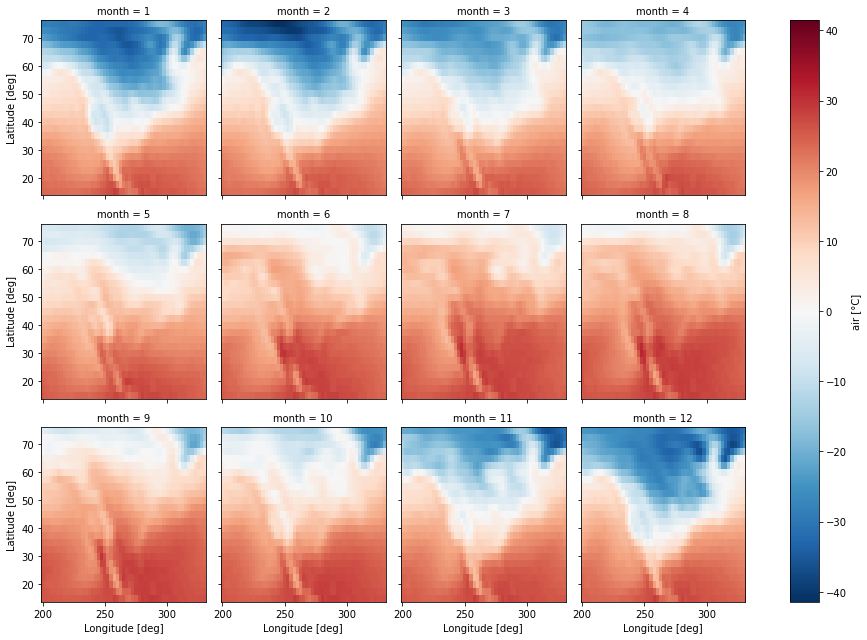

In [6]:
monthly_means.pint.dequantify(format="~P").plot.imshow(col="month", col_wrap=4)